# Sentiment Analysis with Sklearn

In [1]:
import pandas as pd
df_reviews = pd.read_csv('IMDB Dataset.csv')
df_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Count the number of rows & columns
df_reviews.shape

(50000, 2)

In [3]:
# Check missing values
df_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

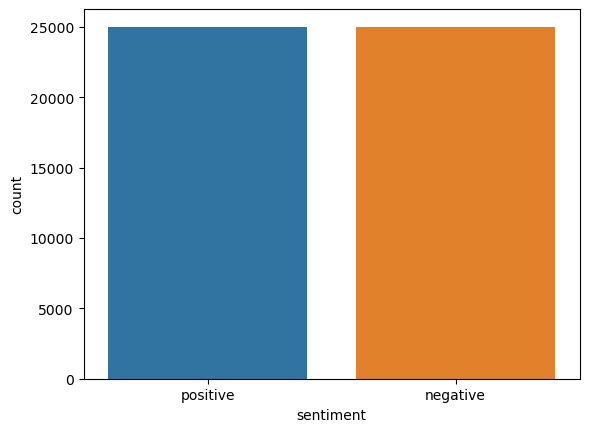

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data=df_reviews, x='sentiment')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df_reviews['review']
y = df_reviews['sentiment']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)
print(train_x.shape, train_y.shape)

(35000,) (35000,)


## Data Preparation

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.transform(test_x)
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

C:\Users\DAD\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,00000000000,00000001,00001,000dm,000s,001,003830,007,...,übermenschlich,überwoman,ünel,üvegtigris,üzümcü,ýs,þorleifsson,þór,יגאל,כרמון
38094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Selection
We will train a set of four classification models and pick the best performer for further development. Classification algorithns used are listed below:
 - Support Vector Machine Classifier (SVC)
 - Linear Support Vector Machine Classifier (LinearCSV)
 - Logistic Regression Classifier (LRC)
 - Decision Tree Classifier (CART)
 - Naive Bayes Classifier (NBC)

In [7]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.pipeline import Pipeline

### Support Vector Machine (SVM)
To fit an SVM model, we need to introduce the input (text reviews as numerical vectors) and output (sentiment)


In [8]:
svc = SVC(random_state=42, max_iter=200)
svc.fit(train_x_vector, train_y)


C:\Users\DAD\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=200, random_state=42)

In [9]:
# After fitting svc we can predict whether a review is positive or negative with the .predict() method.
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all'])))

['positive']
['positive']
['negative']


In [10]:
# Make predictions and check the performance on the holdout test dataset
prediction = svc.predict(test_x_vector)
print(f'Accuracy: {accuracy_score(test_y, prediction):.3f}')
print('\nConfusion Matrix\n', confusion_matrix(test_y, prediction))
print('\nClassification Report\n', classification_report(test_y, prediction))

Accuracy: 0.676

Confusion Matrix
 [[6058 1353]
 [3503 4086]]

Classification Report
               precision    recall  f1-score   support

    negative       0.63      0.82      0.71      7411
    positive       0.75      0.54      0.63      7589

    accuracy                           0.68     15000
   macro avg       0.69      0.68      0.67     15000
weighted avg       0.69      0.68      0.67     15000



### Linear Support Vector Machine Classifier (LSVC)

In [11]:
# Build a pipeline with the LinearSVC
from sklearn.svm import LinearSVC
text_clsf = Pipeline([('tfidf',TfidfVectorizer()),('clf', LinearSVC())])
text_clsf.fit(train_x, train_y)

# Make predictions and check the performance
prediction = text_clsf.predict(test_x)
print(f'Accuracy: {accuracy_score(test_y, prediction):.3f}')
print('\nConfusion Matrix\n', confusion_matrix(test_y, prediction))
print('\nClassification Report\n', classification_report(test_y, prediction))

Accuracy: 0.901

Confusion Matrix
 [[6626  785]
 [ 695 6894]]

Classification Report
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.90      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



### Logistic Regression Classifier (LRC)

In [12]:
# Build a pipeline with the LRC
from sklearn.linear_model import LogisticRegression
text_clsf = Pipeline([('tfidf',TfidfVectorizer()),('clf', LogisticRegression())])
text_clsf.fit(train_x, train_y)

# Make predictions and check the performance
prediction = text_clsf.predict(test_x)
print(f'Accuracy: {accuracy_score(test_y, prediction):.3f}')
print('\nConfusion Matrix\n', confusion_matrix(test_y, prediction))
print('\nClassification Report\n', classification_report(test_y, prediction))

Accuracy: 0.899

Confusion Matrix
 [[6585  826]
 [ 684 6905]]

Classification Report
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90      7411
    positive       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



### Decision Tree Classifier (CART)

In [13]:
# Build a pipeline for CART
from sklearn.tree import DecisionTreeClassifier
text_clsf = Pipeline([('tfidf',TfidfVectorizer()),('clf', DecisionTreeClassifier())])
text_clsf.fit(train_x, train_y)

# Make predictions and check the performance
prediction = text_clsf.predict(test_x)
print(f'Accuracy: {accuracy_score(test_y, prediction):.3f}')
print('\nConfusion Matrix\n', confusion_matrix(test_y, prediction))
print('\nClassification Report\n', classification_report(test_y, prediction))

Accuracy: 0.713

Confusion Matrix
 [[5260 2151]
 [2159 5430]]

Classification Report
               precision    recall  f1-score   support

    negative       0.71      0.71      0.71      7411
    positive       0.72      0.72      0.72      7589

    accuracy                           0.71     15000
   macro avg       0.71      0.71      0.71     15000
weighted avg       0.71      0.71      0.71     15000



### Naive Bayes Classifier (NBC)

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)


MemoryError: Unable to allocate 22.9 GiB for an array with shape (35000, 87687) and data type float64

In [ ]:
# Build a pipeline for Naive Bayes 
from sklearn.naive_bayes import GaussianNB
text_clsf = Pipeline([('tfidf',TfidfVectorizer()),('clf', GaussianNB())])
text_clsf.fit(train_x, train_y)

# Make predictions and check the performance
prediction = text_clsf.predict(test_x)
print(f'Accuracy: {accuracy_score(test_y, prediction):.3f}')
print('\nConfusion Matrix\n', confusion_matrix(test_y, prediction))
print('\nClassification Report\n', classification_report(test_y, prediction))

### Hyperparameter Tuning
#### GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Spot check algorithms
models = []
models.append(('SVC', SVC(kernel='linear')))
models.append(('LRC', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NBC', GaussianNB()))

#Evaluate models
results = []
names = []
kfold = KFold(n_splits=5, random_state=None, shuffle=False)
for name, model in models:
    cv_results = cross_val_score(model, train_x_vector, train_y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))